In [ ]:
import pyarrow.parquet as pq

In [ ]:
# Read
table = pq.read_table('s3://ubs-datasets/bigearthnet/metadata.parquet')
table

pyarrow.Table
patch_id: string
labels: list<element: string>
  child 0, element: string
split: string
country: string
s1_name: string
s2v1_name: string
contains_seasonal_snow: bool
contains_cloud_or_shadow: bool
----
patch_id: [["S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57","S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_27_55","S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_27_56","S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_27_57","S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_27_58",...,"S2A_MSIL2A_20171208T093351_N9999_R136_T34TEN_67_77","S2A_MSIL2A_20171208T093351_N9999_R136_T34TEN_67_78","S2A_MSIL2A_20171208T093351_N9999_R136_T34TEN_67_79","S2A_MSIL2A_20171208T093351_N9999_R136_T34TEN_67_80","S2A_MSIL2A_20171208T093351_N9999_R136_T34TEN_67_81"],["S2A_MSIL2A_20171208T093351_N9999_R136_T34TEN_67_82","S2A_MSIL2A_20171208T093351_N9999_R136_T34TEN_67_83","S2A_MSIL2A_20171208T093351_N9999_R136_T34TEN_67_84","S2A_MSIL2A_20171208T093351_N9999_R136_T34TEN_67_85","S2A_MSIL2A_20171208T09

In [ ]:
pandas_df = table.to_pandas()
pandas_df.head()

,patch_id,labels,split,country,s1_name,s2v1_name,contains_seasonal_snow,contains_cloud_or_shadow
0,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[Arable land, Broad-leaved forest, Mixed fores...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_26_57,S2A_MSIL2A_20170613T101031_26_57,False,False
1,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[Arable land, Broad-leaved forest, Inland wate...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_55,S2A_MSIL2A_20170613T101031_27_55,False,False
2,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[Arable land, Broad-leaved forest, Coniferous ...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_56,S2A_MSIL2A_20170613T101031_27_56,False,False
3,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[Broad-leaved forest, Complex cultivation patt...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_57,S2A_MSIL2A_20170613T101031_27_57,False,False
4,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[Broad-leaved forest, Complex cultivation patt...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_58,S2A_MSIL2A_20170613T101031_27_58,False,False


In [ ]:
import pyarrow.compute as pc

# Extract the prefix up to the timestamp for s1_name
s1_prefix = pc.replace_substring_regex(table['s1_name'], r'((?:[^_]+_){4}[^_]+)_.*', r'\1')

# folder S1 path column
s1_path = pc.binary_join_element_wise("s3://ubs-datasets/bigearthnet/BigEarthNet-S1/", s1_prefix, '')
s1_path_ = pc.binary_join_element_wise(s1_path, table['s1_name'], '/')

# Extract the prefix up to the timestamp for s2 (using patch_id ), according to the folder structure it goes one level deeper for s2
s2_prefix = pc.replace_substring_regex(table['patch_id'], r'((?:[^_]+_){5}[^_]+)_.*', r'\1')

# folder s2 path column
s2_path = pc.binary_join_element_wise("s3://ubs-datasets/bigearthnet/BigEarthNet-S2/", s2_prefix,'')
s2_path_ = pc.binary_join_element_wise(s2_path, table['patch_id'], '/')

# folder reference path column
ref_path = pc.binary_join_element_wise("s3://ubs-datasets/bigearthnet/Reference_Maps/", s2_prefix, '')
ref_path_ = pc.binary_join_element_wise(ref_path, table['patch_id'], '/')


table = table.append_column('s1_path', s1_path_)
table = table.append_column('s2_path', s2_path_)
table = table.append_column('reference_path', ref_path_)


In [ ]:
pandas_df = table.to_pandas()
pandas_df.head()

,patch_id,labels,split,country,s1_name,s2v1_name,contains_seasonal_snow,contains_cloud_or_shadow,s1_path,s2_path,reference_path
0,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[Arable land, Broad-leaved forest, Mixed fores...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_26_57,S2A_MSIL2A_20170613T101031_26_57,False,False,s3://ubs-datasets/bigearthnet/BigEarthNet-S1/S...,s3://ubs-datasets/bigearthnet/BigEarthNet-S2/S...,s3://ubs-datasets/bigearthnet/Reference_Maps/S...
1,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[Arable land, Broad-leaved forest, Inland wate...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_55,S2A_MSIL2A_20170613T101031_27_55,False,False,s3://ubs-datasets/bigearthnet/BigEarthNet-S1/S...,s3://ubs-datasets/bigearthnet/BigEarthNet-S2/S...,s3://ubs-datasets/bigearthnet/Reference_Maps/S...
2,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[Arable land, Broad-leaved forest, Coniferous ...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_56,S2A_MSIL2A_20170613T101031_27_56,False,False,s3://ubs-datasets/bigearthnet/BigEarthNet-S1/S...,s3://ubs-datasets/bigearthnet/BigEarthNet-S2/S...,s3://ubs-datasets/bigearthnet/Reference_Maps/S...
3,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[Broad-leaved forest, Complex cultivation patt...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_57,S2A_MSIL2A_20170613T101031_27_57,False,False,s3://ubs-datasets/bigearthnet/BigEarthNet-S1/S...,s3://ubs-datasets/bigearthnet/BigEarthNet-S2/S...,s3://ubs-datasets/bigearthnet/Reference_Maps/S...
4,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[Broad-leaved forest, Complex cultivation patt...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_58,S2A_MSIL2A_20170613T101031_27_58,False,False,s3://ubs-datasets/bigearthnet/BigEarthNet-S1/S...,s3://ubs-datasets/bigearthnet/BigEarthNet-S2/S...,s3://ubs-datasets/bigearthnet/Reference_Maps/S...


<!-- #### save the metadata to s3  -->

In [ ]:
# save
# pq.write_table(table, 's3://ubs-homes/erasmus/ethel/bigearth/metadata_with_paths.parquet')

<!-- #### lets check if the folder structure produced are right and exists  -->

In [ ]:
import boto3
from tqdm import tqdm

s3_client = boto3.client('s3')

def check_s3_folder_exists(s3_path):
    if not s3_path or not isinstance(s3_path, str) or not s3_path.startswith('s3://'):
        return False
    
    path_parts = s3_path.replace('s3://', '').split('/', 1)
    bucket = path_parts[0]
    prefix = path_parts[1] if len(path_parts) > 1 else ''
    
    if not prefix.endswith('/'):
        prefix += '/'
    
    response = s3_client.list_objects_v2(Bucket=bucket, Prefix=prefix, MaxKeys=1)
    return 'Contents' in response

df = table.to_pandas()

results_exists_on_s3 = {'all_file_found': 0, 'not_found': 0 }

for idx in tqdm(range(len(df))):
    row = df.iloc[idx]
    
    s1_exists = check_s3_folder_exists(row['s1_path'])
    s2_exists = check_s3_folder_exists(row['s2_path'])
    ref_exists = check_s3_folder_exists(row['reference_path'])
    if s1_exists and s2_exists and ref_exists:
        results_exists_on_s3['all_file_found'] += 1
    else:
        results_exists_on_s3['not_found'] += 1  
        print(f"Missing data for patch_id: {row['patch_id']}, S1 exists: {s1_exists}, S2 exists: {s2_exists}, Ref exists: {ref_exists}")
    

In [ ]:
df.columns

Index(['patch_id', 'labels', 'split', 'country', 's1_name', 's2v1_name',
       'contains_seasonal_snow', 'contains_cloud_or_shadow', 's1_path',
       's2_path', 'reference_path'],
      dtype='object')

<!-- ### lets read the data form s3 and try to visualize the contents  -->

In [ ]:
import boto3
from tqdm import tqdm

s3_client = boto3.client('s3')

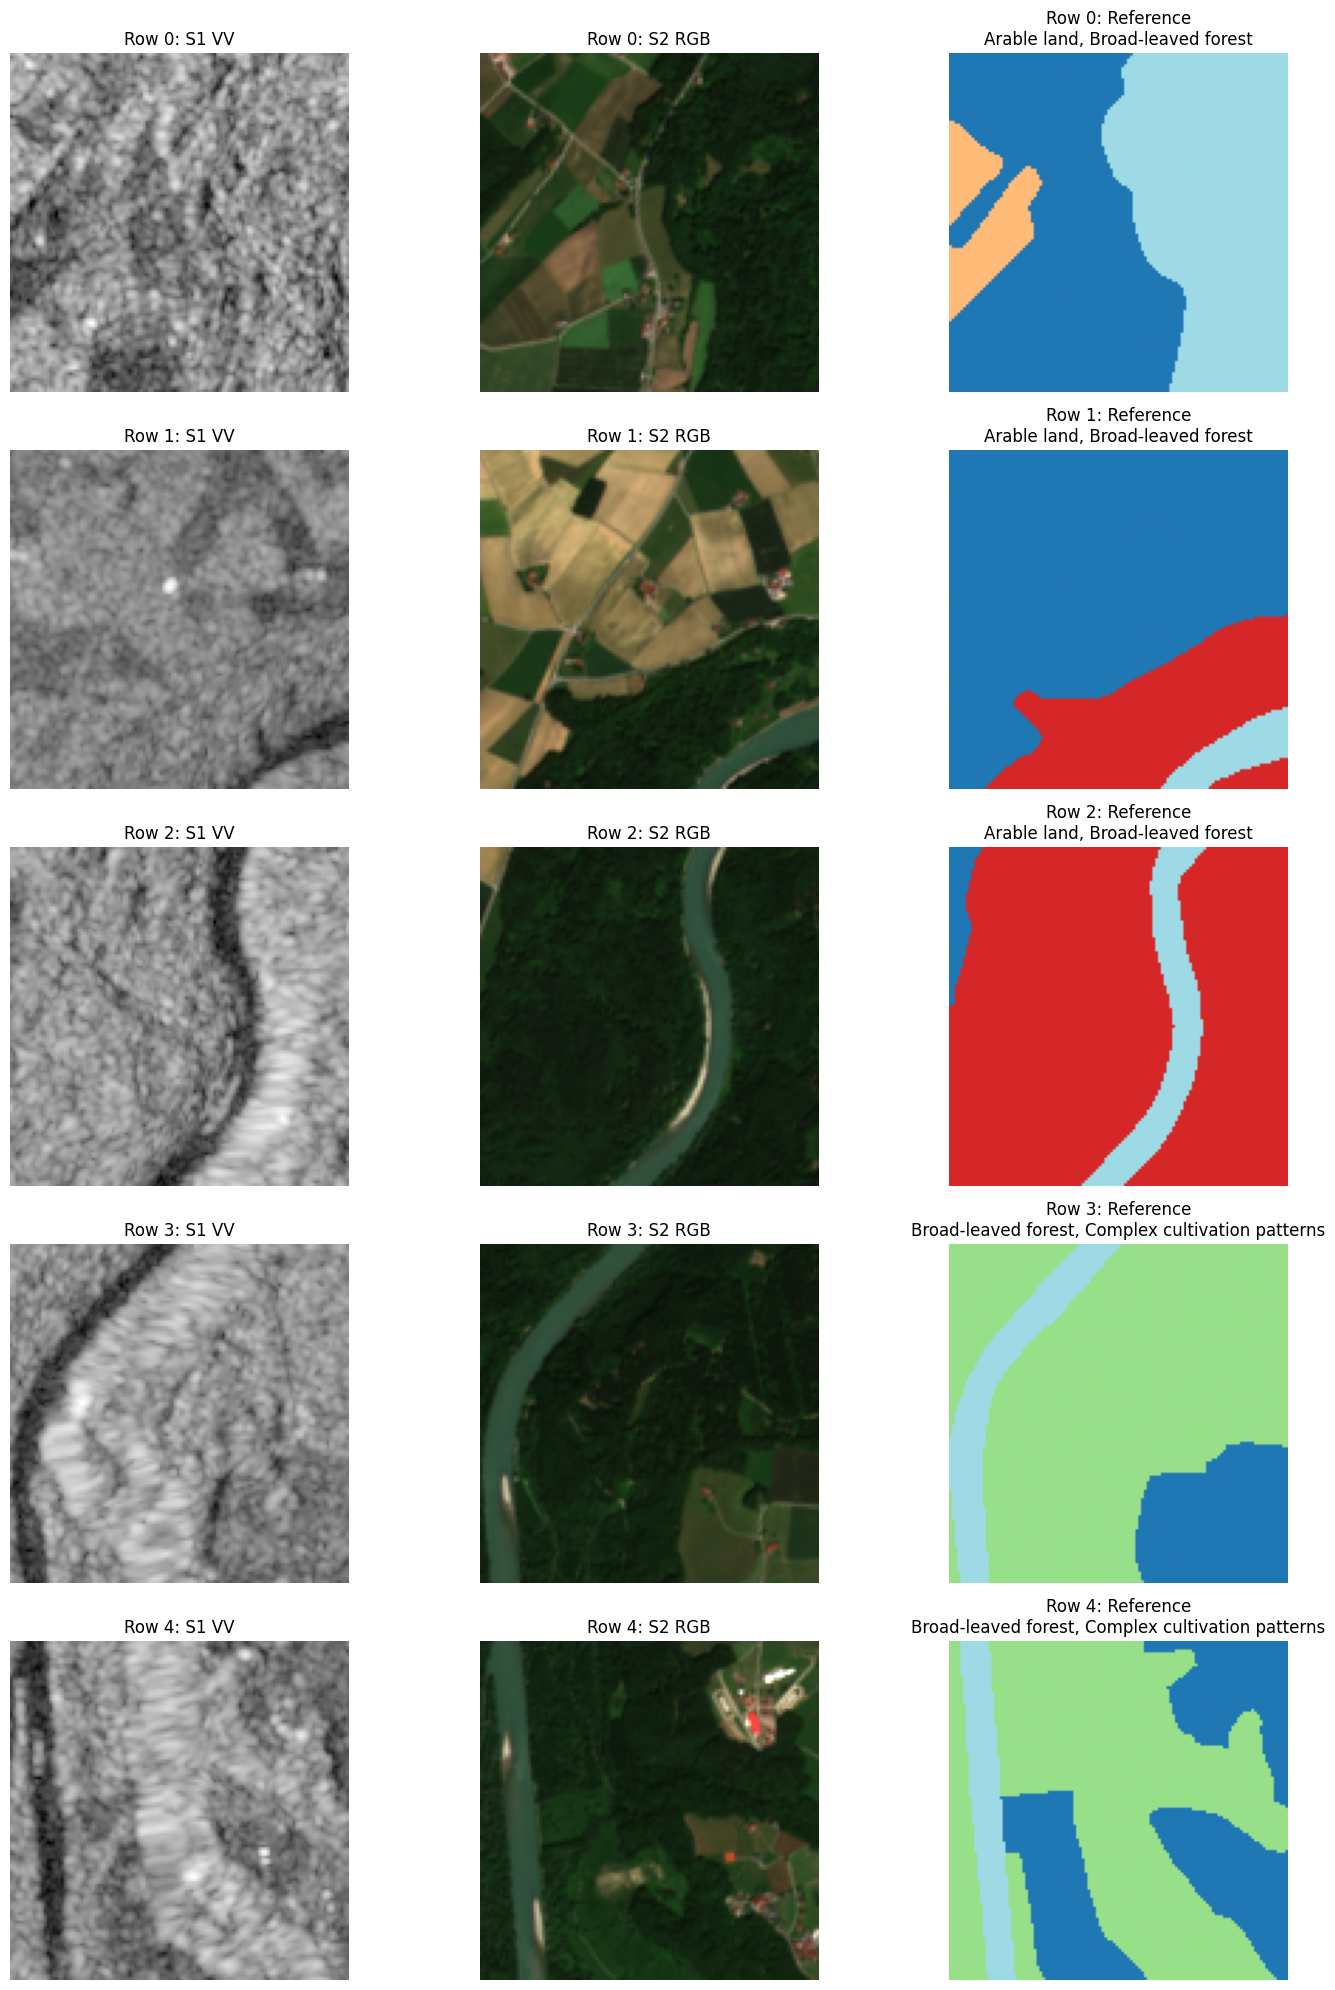

In [ ]:
from rasterio.io import MemoryFile
import matplotlib.pyplot as plt
import numpy as np 


def read_s3_tif(s3_path):
    bucket, key = s3_path.replace('s3://', '').split('/', 1)
    # print(key)
    obj = s3_client.get_object(Bucket=bucket, Key=key)
    with MemoryFile(obj['Body'].read()) as memfile:
        with memfile.open() as dataset:
            return dataset.read()
    
        
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

for idx in range(5):
    row = pandas_df.iloc[idx]
    
    s1_vv = read_s3_tif(f"{row['s1_path']}/{row['s1_name']}_VV.tif") # path is inconsistent here so we need s1_name in the filepath 
    axes[idx, 0].imshow(s1_vv[0], cmap='gray') 
    axes[idx, 0].set_title(f"Row {idx}: S1 VV")
    axes[idx, 0].axis('off')
    
    s2_rgb = np.stack([read_s3_tif(f"{row['s2_path']}/{row['patch_id']}_{b}.tif")[0] for b in ['B04', 'B03', 'B02']], axis=-1) # here we can't use the s2name because its inconsistent so we use patch_id
    s2_rgb = np.clip(s2_rgb / 3000, 0, 1)
    axes[idx, 1].imshow(s2_rgb)
    axes[idx, 1].set_title(f"Row {idx}: S2 RGB")
    axes[idx, 1].axis('off')
    
    ref = read_s3_tif(f"{row['reference_path']}/{row['patch_id']}_reference_map.tif") # for reference since it uses the syntax for the s2 we directly use the patch_id 
    axes[idx, 2].imshow(ref[0], cmap='tab20')
    axes[idx, 2].set_title(f"Row {idx}: Reference\n{', '.join(row['labels'][:2])}")
    axes[idx, 2].axis('off')

plt.tight_layout()
plt.show()

<!-- ### now from files to tensor , and tensor to petastrom  -->

In [ ]:
import os
import argparse
import boto3
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import rasterio
from rasterio.io import MemoryFile
from tqdm import tqdm

s3_client = boto3.client('s3')

def read_s3_tif(s3_path):
    s3 = boto3.client("s3")
    bucket, key = s3_path.replace("s3://", "").split("/", 1)
    obj = s3.get_object(Bucket=bucket, Key=key)
    with MemoryFile(obj["Body"].read()) as mem:
        with mem.open() as ds:
            return ds.read(1)

def pad_to_size(array, target_shape, pad_value=0):
    """Pad array to target shape with specified value"""
    pad_width = [(0, max(0, target - current)) 
                 for target, current in zip(target_shape, array.shape)]
    return np.pad(array, pad_width, mode='constant', constant_values=pad_value)

def sample_stratified(df, fraction):
    if fraction >= 1.0:
        return df
    if 'split' not in df.columns:
        return df.sample(frac=fraction, random_state=42)
    sampled = df.groupby('split', group_keys=False).apply(lambda x: x.sample(frac=fraction, random_state=42), include_groups=False)
    return sampled.reset_index(drop=True)


In [ ]:
from concurrent.futures import ThreadPoolExecutor, as_completed
import numpy as np

def process_patch(row_dict, label_map, target_size=(120, 120)):
    """
    Read S1, S2, reference map, stack channels, and encode multi-hot labels
    """
    try:
        s2_bands = ['B01','B02','B03','B04','B05','B06',
                    'B07','B08','B8A','B09','B11','B12']
        
        # S3 paths for all bands
        s3_paths = {
            's1_vv': f"{row_dict['s1_path']}/{row_dict['s1_name']}_VV.tif",
            's1_vh': f"{row_dict['s1_path']}/{row_dict['s1_name']}_VH.tif",
            'reference': f"{row_dict['reference_path']}/{row_dict['patch_id']}_reference_map.tif"
        }
        for band in s2_bands:
            s3_paths[f's2_{band}'] = f"{row_dict['s2_path']}/{row_dict['patch_id']}_{band}.tif"
        
        # Parallel read
        file_data = {}
        with ThreadPoolExecutor(max_workers=15) as executor:
            future_to_key = {executor.submit(read_s3_tif, path): key for key, path in s3_paths.items()}
            for future in as_completed(future_to_key):
                key = future_to_key[future]
                file_data[key] = future.result()
        
        # S1 stack
        s1_vv = pad_to_size(file_data['s1_vv'], target_size)
        s1_vh = pad_to_size(file_data['s1_vh'], target_size)
        s1_data = np.stack([s1_vv, s1_vh], axis=-1).astype(np.float32)

        # S2 stack
        s2_arrays = [pad_to_size(file_data[f's2_{band}'], target_size) for band in s2_bands]
        s2_data = np.stack(s2_arrays, axis=-1).astype(np.float32)

        # Reference
        reference = pad_to_size(file_data['reference'], target_size)
        reference = np.expand_dims(reference, axis=-1).astype(np.uint8)

        # Multi-hot labels
        labels_vec = np.zeros(len(label_map), dtype=np.int8)
        for lbl in row_dict['labels']:
            labels_vec[label_map[lbl]] = 1

        return {
        'patch_id': row_dict['patch_id'],
        's1': s1_data.tobytes(),
        's2': s2_data.tobytes(),
        'reference': reference.tobytes(),
        'labels': labels_vec.tobytes(),
        }

    except Exception as e:
        print(f"Error processing patch {row_dict['patch_id']}: {e}")
        return None


In [ ]:
from concurrent.futures import ProcessPoolExecutor, as_completed

def convert_files(metadata_path, output_path, label_map, fraction=1.0, workers=10, batch_size=50):

    print(f"Reading metadata from {metadata_path}")
    table = pq.read_table(metadata_path)
    df = table.to_pandas()
    print(f"Total patches: {len(df)}")

    if fraction < 1.0:
        df = sample_stratified(df, fraction)
        print(f"Sampled {len(df)} patches ({fraction*100:.1f}% stratified)")

    target_size = (120,120)
    schema = pa.schema([
    ('patch_id', pa.string()),
    ('s1', pa.binary()),        # flattened s1 array as bytes
    ('s2', pa.binary()),        # flattened s2 array as bytes
    ('reference', pa.binary()), # flattened reference map as bytes
    ('labels', pa.binary()),    # multi-hot labels as bytes
    ])

    records = df.to_dict('records')
    batch_num = 0

    os.makedirs(output_path, exist_ok=True)

    for i in tqdm(range(0, len(records), batch_size), desc="Processing batches"):
        batch = records[i:i+batch_size]

        with ThreadPoolExecutor(max_workers=workers) as executor:
            futures = [executor.submit(process_patch, row, label_map) for row in batch]
            results = [f.result() for f in as_completed(futures) if f.result() is not None]

        if not results:
            continue

        batch_table = pa.table({
            'patch_id': [r['patch_id'] for r in results],
            's1': [r['s1'] for r in results],
            's2': [r['s2'] for r in results],
            'reference': [r['reference'] for r in results],
            'labels': [r['labels'] for r in results],
        }, schema=schema)

        # Write local Parquet file
        pq.write_table(batch_table, f"{output_path}/part-{batch_num:05d}.parquet")
        print(f"Wrote batch {batch_num} with {len(results)} patches")
        batch_num += 1

    print(f"\nDataset saved to {output_path}, total batches: {batch_num}")


In [ ]:
# test
table = pq.read_table("s3://ubs-homes/erasmus/ethel/bigearth/metadata_with_paths.parquet")
df = table.to_pandas()

# Build label_map for multi-hot
all_labels = sorted({l for sublist in df['labels'] for l in sublist})
label_map = {l:i for i,l in enumerate(all_labels)}

# Convert to Parquet
convert_files(
    metadata_path="s3://ubs-homes/erasmus/ethel/bigearth/metadata_with_paths.parquet",
    output_path="s3://ubs-homes/erasmus/ethel/bigearth/test_processed",
    label_map=label_map,
    fraction=0.001,     # 0.1% subset
    workers=2,
    batch_size=50 
)

Reading metadata from s3://ubs-homes/erasmus/ethel/bigearth/metadata_with_paths.parquet
Total patches: 480038
Sampled 480 patches (0.1% stratified)


Processing batches:  10%|█         | 1/10 [00:40<06:07, 40.84s/it]

Wrote batch 0 with 50 patches


Processing batches:  20%|██        | 2/10 [01:16<05:04, 38.05s/it]

Wrote batch 1 with 50 patches


Processing batches:  30%|███       | 3/10 [02:29<06:17, 53.93s/it]

Wrote batch 2 with 50 patches


Processing batches:  40%|████      | 4/10 [04:13<07:21, 73.63s/it]

Wrote batch 3 with 50 patches


Processing batches:  50%|█████     | 5/10 [06:01<07:10, 86.08s/it]

Wrote batch 4 with 50 patches


Processing batches:  60%|██████    | 6/10 [06:59<05:05, 76.49s/it]

Wrote batch 5 with 50 patches
Error processing patch S2B_MSIL2A_20180525T094029_N9999_R036_T35VNL_85_21: Read timeout on endpoint URL: "None"
Error processing patch S2A_MSIL2A_20170813T112121_N9999_R037_T29SNC_00_67: Read timeout on endpoint URL: "None"


Processing batches:  70%|███████   | 7/10 [09:37<05:09, 103.05s/it]

Wrote batch 6 with 48 patches


Processing batches:  80%|████████  | 8/10 [10:15<02:44, 82.49s/it] 

Wrote batch 7 with 50 patches


Processing batches:  90%|█████████ | 9/10 [10:55<01:09, 69.22s/it]

Wrote batch 8 with 50 patches


Processing batches: 100%|██████████| 10/10 [11:16<00:00, 67.70s/it]

Wrote batch 9 with 30 patches

Dataset saved to s3://ubs-homes/erasmus/ethel/bigearth/test_processed, total batches: 10


In [ ]:
if __name__ == "__main__":
    parser = argparse.ArgumentParser(description='Convert BigEarthNet to Parquet format')
    parser.add_argument('--meta', required=True, help='S3 path to metadata parquet')
    parser.add_argument('--out', required=True, help='S3 path for output Parquet data')
    parser.add_argument('--frac', type=float, default=1.0, help='Fraction of data (0.0-1.0), stratified by split')
    parser.add_argument('--workers', type=int, default=10, help='Parallel workers')
    parser.add_argument('--batch', type=int, default=100, help='Batch size')
    
    args = parser.parse_args()
    
    if not 0 < args.frac <= 1.0:
        raise ValueError("frac must be between 0.0 and 1.0")
    convert_files(args.meta, args.out, args.frac, args.workers, args.batch)

def main():
    parser = argparse.ArgumentParser(description='Convert BigEarthNet to Parquet format')
    parser.add_argument('--meta', required=True, help='S3 path to metadata parquet')
    parser.add_argument('--out', required=True, help='S3 path for output Parquet data')
    parser.add_argument('--frac', type=float, default=1.0, help='Fraction (0.0-1.0), stratified by split')
    parser.add_argument('--workers', type=int, default=10, help='Parallel workers')
    parser.add_argument('--batch', type=int, default=100, help='Batch size')
    args = parser.parse_args()
    if not 0 < args.frac <= 1.0:
        raise ValueError("frac must be between 0.0 and 1.0")
    convert_files(args.meta, args.out, args.frac, args.workers, args.batch)

if __name__ == "__main__":
    main()

<!-- tensor to petastorm -->

In [ ]:
import argparse
import os
import tempfile
import boto3
import numpy as np
import tensorflow as tf
from rasterio.io import MemoryFile
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor, as_completed
from tqdm import tqdm

2026-01-12 21:56:42.746383: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-12 21:56:42.749423: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-12 21:56:42.763074: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-12 21:56:42.780338: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2026-01-12 21:56:42.799435: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [ ]:
def read_s3_tif(s3_path):
    """Download and read GeoTIFF from S3."""
    s3_client = boto3.client('s3')
    bucket, key = s3_path.replace('s3://', '').split('/', 1)
    obj = s3_client.get_object(Bucket=bucket, Key=key)
    with MemoryFile(obj['Body'].read()) as memfile:
        with memfile.open() as dataset:
            return dataset.read()

def pad_to_size(array, target_shape, pad_value=0):
    """Pad 2D array to target shape with zeros."""
    pad_width = [(0, max(0, target - current)) 
                 for target, current in zip(target_shape, array.shape)]
    return np.pad(array, pad_width, mode='constant', constant_values=pad_value)

def process_patch(row_dict, target_size=(120, 120)):
    """Download, process, and combine S1, S2, and label data for a single patch."""
    try:

        # Build S3 paths for all bands
        # s2_bands = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12']
        s2_bands = [ 'B02', 'B03', 'B04', 'B08']
        s3_paths = {
            's1_vv': f"{row_dict['s1_path']}/{row_dict['s1_name']}_VV.tif",
            's1_vh': f"{row_dict['s1_path']}/{row_dict['s1_name']}_VH.tif",
            'label': f"{row_dict['reference_path']}/{row_dict['patch_id']}_reference_map.tif"

        }
        for band in s2_bands:
            s3_paths[f's2_{band}'] = f"{row_dict['s2_path']}/{row_dict['patch_id']}_{band}.tif"
        
        # Download all files in parallel (15 concurrent requests)
        file_data = {}
        with ThreadPoolExecutor(max_workers=15) as executor:
            future_to_key = {executor.submit(read_s3_tif, path): key for key, path in s3_paths.items()}
            for future in as_completed(future_to_key):
                key = future_to_key[future]
                file_data[key] = future.result()[0]  # Get first band
        
        # Stack S1 bands (VV, VH) -> (120, 120, 2)
        s1_data = np.stack([
            pad_to_size(file_data['s1_vv'], target_size),
            pad_to_size(file_data['s1_vh'], target_size)
        ], axis=-1).astype(np.float32)
        
        # Stack S2 bands (4 bands) -> (120, 120, 4)
        s2_data = np.stack([
            pad_to_size(file_data[f's2_{band}'], target_size) for band in s2_bands
        ], axis=-1).astype(np.float32)
        
        # combine s1+s2 -> (120, 120, 6)
        input_data = np.concatenate([s1_data, s2_data], axis=-1).astype(np.float32)

        # Process label map -> (120, 120)
        label = pad_to_size(file_data['label'], target_size).astype(np.uint8)
        
        return {
            'patch_id': row_dict['patch_id'],
            'input_data': input_data,
            'label': label,
            'split': row_dict['split']  # NEW add split to the final output -- is this needed?
        }
    except Exception as e:
        print(f"Error processing {row_dict['patch_id']}: {e}")
        return None

def sample_stratified(df, fraction):
    """Sample dataset maintaining train/val/test split proportions."""
    if fraction >= 1.0:
        return df
    if 'split' not in df.columns:
        return df.sample(frac=fraction, random_state=42)
    return df.groupby('split', group_keys=False).apply(
        lambda x: x.sample(frac=fraction, random_state=42)
    ).reset_index(drop=True)

#NEW
def split_dataset(df, fraction=1.0):
    """Split DataFrame into train, val, test sets."""
    df = sample_stratified(df, fraction)
    
    train_df = df[df['split'] == 'train'].reset_index(drop=True)
    val_df   = df[df['split'] == 'val'].reset_index(drop=True)
    test_df  = df[df['split'] == 'test'].reset_index(drop=True)
    
    return train_df, val_df, test_df


In [29]:
import os
from concurrent.futures import ThreadPoolExecutor, as_completed
import numpy as np
import pyarrow.parquet as pq
from pyspark.sql import SparkSession
from pyspark.sql.types import StringType
from petastorm.etl.dataset_metadata import materialize_dataset
from petastorm.unischema import Unischema, UnischemaField, dict_to_spark_row
from petastorm.codecs import NdarrayCodec, ScalarCodec


In [31]:
def convert_to_petastorm(metadata_path, output_base_dir, fraction=1.0, target_size=(120, 120), workers=10, rowgroup_size_mb=256, spark_memory='4g'):
    """Convert train/val/test patches into Petastorm datasets ."""

    print(f"Reading metadata from {metadata_path}")
    table = pq.read_table(metadata_path)
    df = table.to_pandas()
    print(f"Total patches: {len(df)}")

    # Sample and split
    df_sampled = sample_stratified(df, fraction)
    train_df, val_df, test_df = split_dataset(df_sampled)
    datasets = {'train': train_df, 'val': val_df, 'test': test_df}

    # Define Petastorm schema (S1+S2 stacked -> 6 channels)
    input_shape = (*target_size, 6)
    label_shape = target_size

    InputSchema = Unischema('InputSchema', [
        UnischemaField('patch_id', str, (), ScalarCodec(StringType()), False),
        UnischemaField('input_data', np.float32, input_shape, NdarrayCodec(), False),
        UnischemaField('label', np.uint8, label_shape, NdarrayCodec(), False),
    ])

    output_paths = {}

    # Create local Spark session
    spark = SparkSession.builder \
        .master("local[*]") \
        .appName("Petastorm_BigEarthNet") \
        .config('spark.driver.memory', spark_memory) \
        .getOrCreate()
    sc = spark.sparkContext

    try:
        for split_name, split_df in datasets.items():
            if split_df.empty:
                print(f"No patches in {split_name}. Skipping.")
                continue

            print(f"\nProcessing {split_name} split ({len(split_df)} patches)...")

            # Preprocess patches in parallel
            records = split_df.to_dict('records')
            processed_patches = []
            with ThreadPoolExecutor(max_workers=workers) as executor:
                futures = [executor.submit(process_patch, row, target_size) for row in records]
                for f in tqdm(as_completed(futures), total=len(futures), desc=f"Processing {split_name}"):
                    res = f.result()
                    if res:
                        processed_patches.append(res)

            if not processed_patches:
                print(f"No patches processed for {split_name}. Skipping.")
                continue

            def row_generator(data):
                for item in data:
                    yield {
                        'patch_id': item['patch_id'],
                        'input_data': item['input_data'],
                        'label': item['label']
                    }

            # Output path
            split_path = os.path.join(output_base_dir, split_name)
            os.makedirs(split_path, exist_ok=True)
            print(f"Materializing {split_name} dataset at {split_path}...")

            # Materialize Petastorm dataset
            with materialize_dataset(spark, split_path, InputSchema) as writer:
                rows_rdd = sc.parallelize(list(row_generator(processed_patches))) \
                             .map(lambda x: dict_to_spark_row(InputSchema, x))
                rows_df = spark.createDataFrame(rows_rdd, InputSchema.as_spark_schema())
                rows_df.coalesce(4).write.mode("overwrite").parquet(split_path)

            output_paths[split_name] = split_path
            print(f"{split_name} dataset saved: {split_path} ({len(processed_patches)} patches)")

    finally:
        spark.stop()
        print("Spark session stopped.")

    return output_paths


In [ ]:
# def convert_to_petastorm(metadata_path, output_base_dir,
#                          fraction=1.0, target_size=(120,120),
#                          workers=10, rowgroup_size_mb=256):
#     """Convert train/val/test data into Petastorm datasets (Python-only)."""
    
#     import os
#     import pyarrow.parquet as pq
#     import numpy as np
#     from concurrent.futures import ThreadPoolExecutor, as_completed
#     from tqdm import tqdm

#     from petastorm.unischema import Unischema, UnischemaField, dict_to_spark_row
#     from petastorm.codecs import NdarrayCodec, ScalarCodec
#     from petastorm.etl.dataset_metadata import materialize_dataset
#     from pyspark.sql.types import StringType  # for ScalarCodec string type


#     # --- Read metadata ---
#     print(f"Reading metadata from {metadata_path}")
#     table = pq.read_table(metadata_path)
#     df = table.to_pandas()
#     print(f"Total patches: {len(df)}")
    
#     # --- Sample and split ---
#     df_sampled = sample_stratified(df, fraction)
#     train_df, val_df, test_df = split_dataset(df_sampled)
#     datasets = {'train': train_df, 'val': val_df, 'test': test_df}
    
#     # --- Define Petastorm schema ---
#     input_shape = (*target_size, 6)
#     label_shape = target_size
    
#     InputSchema = Unischema('InputSchema', [
#         UnischemaField('patch_id', str, (), ScalarCodec(StringType()), False),
#         UnischemaField('input_data', np.float32, input_shape, NdarrayCodec(), False),
#         UnischemaField('label', np.uint8, label_shape, NdarrayCodec(), False),
#     ])
    
#     # --- Process and materialize each split ---
#     output_paths = {}
#     for split_name, split_df in datasets.items():
#         if split_df.empty:
#             print(f"No samples in {split_name} split. Skipping...")
#             continue
        
#         records = split_df.to_dict('records')
#         processed_patches = []
        
#         print(f"\nProcessing {split_name} split ({len(records)} patches)...")
#         with ThreadPoolExecutor(max_workers=workers) as executor:
#             futures = [executor.submit(process_patch, row, target_size) for row in records]
#             for f in tqdm(as_completed(futures), total=len(futures), desc=f"Processing {split_name}"):
#                 res = f.result()
#                 if res:
#                     processed_patches.append(res)
        
#         if not processed_patches:
#             print(f"No patches processed for {split_name}. Skipping...")
#             continue
        
#         # Output directory
#         split_path = os.path.join(output_base_dir, split_name)
#         os.makedirs(split_path, exist_ok=True)
#         print(f"Writing {split_name} Petastorm dataset to {split_path}...")
        
#         def row_generator(data):
#             for item in data:
#                 yield {
#                     'patch_id': item['patch_id'],
#                     'input_data': item['input_data'],
#                     'label': item['label']
#                 }

#         # Materialize dataset
#         with materialize_dataset(dataset_url=split_path,schema=InputSchema,
#                                  rowgroup_iterable=row_generator(processed_patches)):
#             print(f"{split_name} dataset saved to {split_path} ({len(processed_patches)} patches).")
        
#         output_paths[split_name] = split_path
    
#     return output_paths


In [ ]:
output_paths = convert_to_petastorm(
    metadata_path="s3://ubs-homes/erasmus/ethel/bigearth/metadata_with_paths.parquet",
    output_base_dir="s3://ubs-homes/erasmus/ethel/bigearth/petastorm_dataset",
    fraction=0.001,          # 0.1% subset for testing
    target_size=(120, 120),  # desired patch size
    workers=8,               # parallel threads for preprocessing
    rowgroup_size_mb=256,    # Petastorm rowgroup size
    spark_memory='4g'        # Spark driver memory
)